
**House price prediction using Linear Regression.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
data = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
df['MainRoad'] = df.mainroad.map({'no': 0 , 'yes': 1})
df['GuestRoom'] = df.guestroom.map({'no': 0, 'yes': 1})
df['Basement'] = df.basement.map({'no': 0, 'yes': 1})
df['AirConditioning'] = df.airconditioning.map({'no': 0, 'yes': 1})
df['PrefArea'] =df.prefarea.map({'no':0, 'yes':1})
df['FurnishingStatus'] = df.furnishingstatus.map({'unfurnished':0, 'semi-furnished':1,'furnished':2})
df['HotWaterHeating'] = df.hotwaterheating.map({'no': 0 , 'yes': 1})

In [ ]:
df.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],axis=1,inplace=True)

In [ ]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,parking,MainRoad,GuestRoom,Basement,AirConditioning,PrefArea,FurnishingStatus,HotWaterHeating
0,13300000,7420,4,2,3,2,1,0,0,1,1,2,0
1,12250000,8960,4,4,4,3,1,0,0,1,0,2,0
2,12250000,9960,3,2,2,2,1,0,1,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,1,1,2,0
4,11410000,7420,4,1,2,2,1,1,1,1,0,2,0
5,10850000,7500,3,3,1,2,1,0,1,1,1,1,0
6,10150000,8580,4,3,4,2,1,0,0,1,1,1,0
7,10150000,16200,5,3,2,0,1,0,0,0,0,0,0
8,9870000,8100,4,1,2,2,1,1,1,1,1,2,0
9,9800000,5750,3,2,4,1,1,1,0,1,1,0,0


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'MainRoad', 'GuestRoom', 'Basement', 'AirConditioning', 'PrefArea',
       'FurnishingStatus', 'HotWaterHeating'],
      dtype='object')

In [ ]:
X=df[[ 'area', 'bedrooms', 'bathrooms', 'stories', 'parking','MainRoad', 'GuestRoom', 'Basement', 'HotWaterHeating','AirConditioning', 'PrefArea', 'FurnishingStatus']]
Y=df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predict = lin_model.predict(X_test)
predict

array([ 3358068.53544935,  8464191.99499452,  3205429.62578451,
        3436225.70027218,  2972459.97655173,  7375555.83990435,
        6426149.39050664,  4460869.40645301,  3845075.6553084 ,
        4542704.51165384,  2479695.2655871 ,  4012051.85203732,
        3728004.14128508,  5191969.36010061,  3851534.17868486,
        3634498.49587972,  4891753.13599567,  4017390.97506914,
        6255633.83606134,  6596313.36949275,  5220009.43966466,
        6257876.38468613,  4403616.1605166 ,  3518943.92736549,
        4996035.11953327,  2693941.34633537,  4890504.42832327,
        3093629.39198836,  5843345.10526967,  2876011.09352742,
        3954949.01527096,  4504875.19900095,  3923068.04639501,
        5160019.1352634 ,  6328907.80195805,  2715873.82029955,
        2897122.39938055,  6393742.78419428,  4932432.64533224,
        4492205.2832729 ,  3705945.44389484,  2307340.64568853,
        3613287.46778586,  7334268.95022631,  3344675.57369223,
        4893387.85874296,  3590684.32584

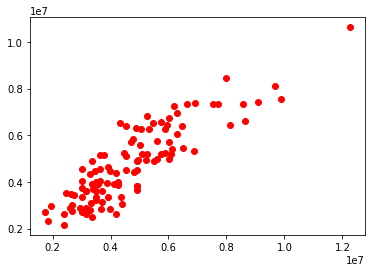

In [ ]:
plt.scatter(Y_test, predict, c = 'Red')

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, predict)

0.7624579467323477